# Part 7 - Lesson 3 - Notebook

In [1]:
pwd

'/Users/skobiako/development/private/tensorflow-certification/problems/transfer_learning'

In [2]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = './model/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None
                                )

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False

2022-01-06 01:52:09.185121: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1. / 255.,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1.0 / 255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory('../dogs_and_cats/dataset/training_set',
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory('../dogs_and_cats/dataset/test_set',
                                                        batch_size=20,
                                                        class_mode='binary',
                                                        target_size=(150, 150))

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [24]:
from tensorflow.keras.optimizers import RMSprop

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer=RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])

last layer output shape:  (None, 7, 7, 768)


In [25]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_steps=50
)

/var/folders/kv/7xk61ddx3tsd7chkptyw373h0000gp/T/ipykernel_26851/3148701690.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
100/100 [==============================] - 57s 537ms/step - loss: 0.3699 - acc: 0.8585 - val_loss: 0.1302 - val_acc: 0.9400
Epoch 2/20
100/100 [==============================] - 56s 563ms/step - loss: 0.2390 - acc: 0.9005 - val_loss: 0.0738 - val_acc: 0.9600
Epoch 3/20
100/100 [==============================] - 54s 543ms/step - loss: 0.2102 - acc: 0.9130 - val_loss: 0.1348 - val_acc: 0.9400
Epoch 4/20
100/100 [==============================] - 51s 507ms/step - loss: 0.2260 - acc: 0.9280 - val_loss: 0.0774 - val_acc: 0.9600
Epoch 5/20
100/100 [==============================] - 52s 513ms/step - loss: 0.2014 - acc: 0.9245 - val_loss: 0.2300 - val_acc: 0.9000
Epoch 6/20
100/100 [==============================] - 51s 512ms/step - loss: 0.1975 - acc: 0.9240 - val_loss: 0.1365 - val_acc: 0.9400
Epoch 7/20
100/100 [==============================] - 54s 534ms/step - loss: 0.1934 - acc: 0.9280 - val_loss: 0.1073 - val_acc: 0.9600
Epoch 8/20
100/100 [==============================] - 5

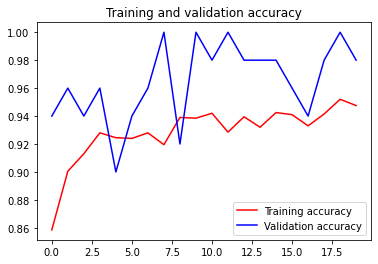

<Figure size 432x288 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()